<a href="https://colab.research.google.com/github/EnriquezAJP/CCDEPRLR_EXERCISES_COM211/blob/main/Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np

In [6]:
tokenizer = Tokenizer()

data = open('sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

1. Create the LSTM model

In [85]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.15))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='relu'))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())


Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_55 (Embedding)    (None, 10, 100)           337500    
                                                                 
 bidirectional_81 (Bidirect  (None, 10, 300)           301200    
 ional)                                                          
                                                                 
 dropout_54 (Dropout)        (None, 10, 300)           0         
                                                                 
 bidirectional_82 (Bidirect  (None, 300)               541200    
 ional)                                                          
                                                                 
 dense_48 (Dense)            (None, 3375)              1015875   
                                                                 
 dense_49 (Dense)            (None, 3375)            

In [86]:
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 17s 22ms/step - loss: 6.8030 - accuracy: 0.0251
Epoch 2/100
484/484 [==============================] - 7s 14ms/step - loss: 6.3937 - accuracy: 0.0343
Epoch 3/100
484/484 [==============================] - 6s 13ms/step - loss: 6.1281 - accuracy: 0.0445
Epoch 4/100
484/484 [==============================] - 7s 15ms/step - loss: 5.8097 - accuracy: 0.0592
Epoch 5/100
484/484 [==============================] - 6s 13ms/step - loss: 5.4606 - accuracy: 0.0717
Epoch 6/100
484/484 [==============================] - 7s 14ms/step - loss: 5.1006 - accuracy: 0.0880
Epoch 7/100
484/484 [==============================] - 6s 13ms/step - loss: 4.7055 - accuracy: 0.1087
Epoch 8/100
484/484 [==============================] - 7s 14ms/step - loss: 4.2602 - accuracy: 0.1432
Epoch 9/100
484/484 [==============================] - 6s 13ms/step - loss: 3.7353 - accuracy: 0.1948
Epoch 10/100
484/484 [==============================] - 7s 14ms/step - loss: 3.16

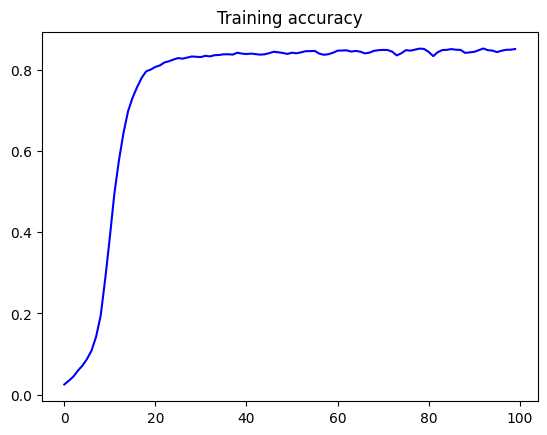

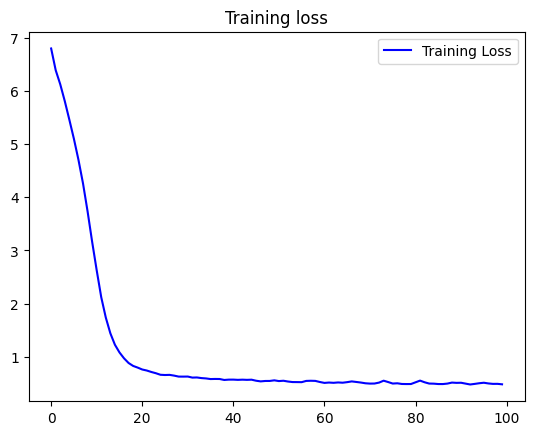

In [87]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [88]:
seed_text = "And so shall I lay bear with the sorrows, thyne love seen nevermore"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis = -1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 19ms/step
And so shall I lay bear with the sorrows, thyne love seen nevermore me of me to latch of thee and i be part of thee to lie in me and i am blind friend of thee of thee more best in thee of you to you to you to me it doth i can see me and thine and thine own love in thee thy tongue that smells to catch me are the ground of state and date to ruining gems torn doth growest a part of thine is allay'd of verse of woe to growest dead in fate reeks wish'd decrease hearted prove the prove true in minds in thy 'will'
